# Model_Free_Analysis_Decision_Making

### This script takes perform analyses on the decision-making phase data of the paradigm

#### Created by: Ziv Ben-Zion & Nachshon Korem 
#### Last Updated: April, 2023


In [126]:
# Importing Relevant Packages

# Comma-Separated Values (CSV) package is a built-in module that provides functionality for working with CSV files
import csv

# Pandas is a package for data manipulation, analysis, and visualization (pd is a short name)
import pandas as pd

# NumPy (Numerical Python) is a package for scientific computing, data analysis, and numerical computations (np is a short name)
import numpy as np

# matplotlib is a popular Python library used for creating visualizations and plots
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns

In [127]:
#define the csv file created by the "Organize_Decision_Making_Data" script
data = "C:\\Users\\zhb4\\Box Sync\\Neural Computations\\Online Pilot\\Decision_Making_Data_40.csv"

# Load the CSV file into a pandas dataframe
df = pd.read_csv(data)

# Create new variables (columns) and add to the dataframe
df['correct_decision'] = 0 #correct decision (choosing the higher objective value) is 1, incorrect decision is 0
df['trial_type'] = "Mixed" #trial type can be choosing between rewards, punishments, or mixed
df['inconsistency'] = 0 #at the exact same decision, whether individual choose the same (0) or different (1)

In [128]:
#These 2 loops iterates over each row in df using the iterrows() method.For each row, it checks certain conditions using if and
#elif statements and updates the corresponding values in the DataFrame using the at[] method.

#For each row in df, if the value in the 'stim1' column is greater than the value in the 'stim2' column AND the value in the
#'decision' column is equal to 1, then update the corresponding value in the 'correct_decision' column to 1. Similarly, if stim1
#is smaller than stim 2 AND the decision is 2, then update correct decision to 1. Otherwise, leave it 0. 
for index, row in df.iterrows():
    if row['stim1'] > row['stim2'] and row['decision'] == 1:
        df.at[index, 'correct_decision'] = 1
    elif row['stim1'] < row['stim2'] and row['decision'] == 2:
        df.at[index, 'correct_decision'] = 1

#For each row in df, if the value in the 'stim1' column is greater than zero AND the value in the 'stim2' column in greater than
#zero, then update the corresponding value in the 'trial_type' column to 'Rewards'. If both stim1 and stim2 are negative, then
#update trial_type to Punishments. Otherwise, keep it as Mixed (choosing between a reward and a punishment).
for index, row in df.iterrows():
    if row['stim1'] > 0 and row['stim2'] > 0:
        df.at[index, 'trial_type'] = "Rewards"
    elif row['stim1'] < 0 and row['stim2'] < 0:
        df.at[index, 'trial_type'] = "Punishments"



In [130]:
df.to_csv('df.csv', index=False)

In [92]:
#A Python list with the six different stimuli values (as integer values)
#high/med/low punishment and low/med/high reward
stim_values = [-80, -50, -20, 20, 50, 80]

# Create an empty list to store results for each stimulus
results = []

In [102]:
#Loop over all pairs of stimulus values (decisions) between stim1 and stim2
#This nested loop is commonly used to generate all possible pairs of values from a list
for i in range(len(stim_values)):
    for j in range(i+1, len(stim_values)):
        stim1 = stim_values[i]
        stim2 = stim_values[j]

        #Loop over all subjects 
        #The .values[0] is used to extract the first (and only) element of the resulting NumPy array (here, the decision value)
        for sub in df['sub'].unique():
            # Get the decision for the first trial of a given decision
            decision1 = df[(df['sub'] == sub) & (df['stim1'] == stim1) & (df['stim2'] == stim2)]['decision'].values[0]
            # Get the decision for the second trial of the SAME IDENTICAL decision
            decision2 = df[(df['sub'] == sub) & (df['stim1'] == stim2) & (df['stim2'] == stim1)]['decision'].values[0]
            # Calculate inconsistency, whether the same choice was made (0) or not (1)
            if decision1 == decision2:
                inconsistency = 1
            else:
                inconsistency = 0 
         
            # Add the result to the list
            trial_type = df[(df['sub'] == sub) & (df['stim1'] == stim1) & (df['stim2'] == stim2)]['trial_type'].values[0]
            results.append({'sub': sub, 'stim1': stim1, 'stim2': stim2, 'inconsistency': inconsistency, 'trial_type': trial_type})

In [103]:
#save into results: Subject id, Stim1 & Stim2 values, inconsistency (0/1) and trial type (Rewards/Punishments/Mixed)
results_df = pd.DataFrame(results)

#group the data by unique combinations of the 'sub' and 'trial_type' columns
#remove stim1 and stim2 values, keep trial type
#calculate mean of inconsistency for each subject
grouped_results = results_df.groupby(['sub','trial_type']).mean().reset_index()[['sub', 'trial_type','inconsistency']]

#save subject numbers, trial and correct decision to csv
pivoted_results = grouped_results.pivot(index='sub', columns='trial_type', values='inconsistency').reset_index()
pivoted_results.to_csv('pivoted_results_40.csv', index=False)

In [104]:
results_df

,sub,stim1,stim2,inconsistency,trial_type,stim_dec
0,100,-80,-50,0,Punishments,NaN
1,101,-80,-50,0,Punishments,NaN
2,102,-80,-50,0,Punishments,NaN
3,82,-80,-50,1,Punishments,NaN
4,84,-80,-50,0,Punishments,NaN
...,...,...,...,...,...,...
895,95,50,80,0,Rewards,NaN
896,96,50,80,0,Rewards,NaN
897,97,50,80,0,Rewards,NaN
898,98,50,80,0,Rewards,NaN


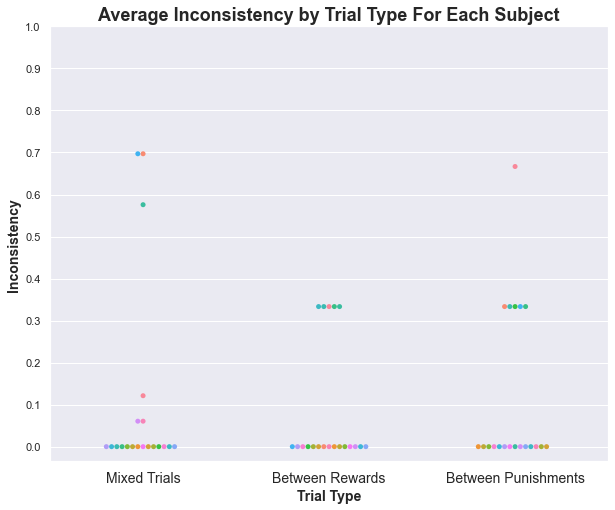

In [105]:
#plot the mean inconsistency for each trial_type category, with different color for each subject
sns.swarmplot(data=grouped_results, x = 'trial_type', y='inconsistency', hue='sub')

#adjust y-axis
yticks = np.arange(0,1.1,0.1)
plt.yticks(yticks)

#remove legend
plt.legend([],[], frameon=False)

#adjust axes titles
plt.xlabel('Trial Type', fontsize=14, fontweight='bold')
plt.ylabel('Inconsistency', fontsize=14, fontweight='bold')

#adjust ticks on the x-axis
plt.tick_params(axis='x', which='major', labelsize=14)
plt.xticks([0, 1, 2], ['Mixed Trials', 'Between Rewards', 'Between Punishments'])

#create plot title
plt.title('Average Inconsistency by Trial Type For Each Subject', fontdict={'fontname': 'Arial', 'fontsize': 18, 'fontweight': 'bold'})

#set figure size in inches
sns.set(rc={'figure.figsize':(10,8)})

#add line connecting the dots
#sns.lineplot(data=grouped_results, x = 'trial_type', y='inconsistency', hue='sub') 

# Save the plot as a PNG
#plt.savefig("C:\\Users\\zhb4\\Box Sync\\Neural Computations\\Online Pilot\\Inconsistency_Plot_40.png")


In [111]:
# Group the dataframe by subject number
grouped = df.groupby(['sub']).mean().reset_index()

# Group the dataframe by subject number and trial type
grouped = df.groupby(['sub',"trial_type"]).mean().reset_index()

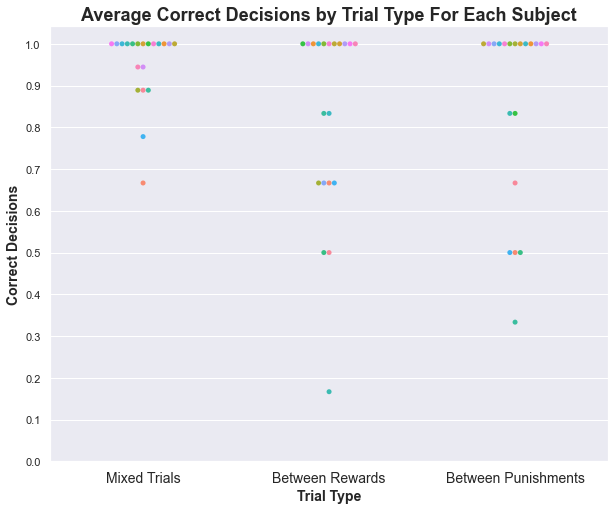

In [107]:
#plot the mean correct decisions for each trial_type category, with different color for each subject
sns.swarmplot(data=grouped, x='trial_type', y='correct_decision', hue='sub')

#adjust y-axis
yticks = np.arange(0,1.1,0.1)
plt.yticks(yticks)

#remove legend
plt.legend([],[], frameon=False)

#adjust axes titles
plt.xlabel('Trial Type', fontsize=14, fontweight='bold')
plt.ylabel('Correct Decisions', fontsize=14, fontweight='bold')

#adjust ticks on the x-axis
plt.tick_params(axis='x', which='major', labelsize=14)
plt.xticks([0, 1, 2], ['Mixed Trials', 'Between Rewards', 'Between Punishments'])

#create plot title
plt.title('Average Correct Decisions by Trial Type For Each Subject', fontdict={'fontname': 'Arial', 'fontsize': 18, 'fontweight': 'bold'})

#set figure size in inches
sns.set(rc={'figure.figsize':(10,8)})

#add line connecting the dots
#sns.lineplot(data=grouped, x='trial_type', y='correct_decision', hue='sub', alpha=0.2)

# Save the plot as a PNG
#plt.savefig("C:\\Users\\zhb4\\Box Sync\\Neural Computations\\Online Pilot\\Correct_Decisions_Plot.png")

#save to csv
#group the data by unique combinations of the 'sub' and 'trial_type' columns and calculate the mean of correct decisions for each subject
grouped = df.groupby(['sub', 'trial_type']).mean().reset_index()[['sub', 'trial_type', 'correct_decision']]

#pivot the data to have trial types as columns
pivoted_results = grouped.pivot(index='sub', columns='trial_type', values='correct_decision').reset_index()

#rename the columns
pivoted_results.columns = ['sub', 'Mixed_Trials', 'Between_Rewards', 'Between_Punishments']

#save the data to a CSV file
#pivoted_results.to_csv('correct_decisions_by_trial_type_40.csv', index=False)


In [112]:
grouped

,sub,trial_type,time,trial,stim1,stim2,decision,RT_decision,val1,RT_val1,conf1,RT_conf1,val2,RT_val2,conf2,RT_conf2,conf_decision,RT_conf_decision,correct_decision,inconsistency
0,82,Mixed,1.678835e+12,21.5,0.0,0.0,1.388889,1.188167,11.333333,3.019667,5.777778,1.550889,11.111111,2.474444,5.333333,2.195556,4.777778,1.718556,0.888889,0.0
1,82,Punishments,1.678835e+12,3.5,-50.0,-50.0,1.666667,3.890500,13.666667,3.765000,5.666667,2.783333,13.000000,2.139333,6.333333,1.693333,6.333333,2.001000,0.500000,0.0
2,82,Rewards,1.678835e+12,9.5,50.0,50.0,1.833333,2.181833,12.666667,4.284000,4.333333,2.040667,15.666667,3.436333,4.666667,1.579000,7.000000,2.696667,0.666667,0.0
3,84,Mixed,1.678836e+12,9.5,0.0,0.0,1.277778,1.545333,9.888889,14.663111,3.666667,2.001000,9.333333,4.569333,3.111111,1.853000,4.000000,2.275222,0.666667,0.0
4,84,Punishments,1.678836e+12,27.5,-50.0,-50.0,1.500000,1.318833,8.333333,2.277667,4.333333,1.432667,7.000000,1.647333,3.333333,1.361667,3.333333,2.112000,0.666667,0.0
5,84,Rewards,1.678836e+12,21.5,50.0,50.0,1.666667,1.179333,7.666667,2.379667,2.666667,1.382000,9.666667,1.985333,2.666667,1.344000,5.000000,1.613667,0.500000,0.0
6,85,Mixed,1.678836e+12,21.5,0.0,0.0,1.500000,2.267278,11.444444,3.932000,5.666667,6.134000,9.444444,6.027333,5.888889,3.209222,6.888889,3.533444,1.000000,0.0
7,85,Punishments,1.678836e+12,9.5,-50.0,-50.0,1.500000,2.436333,7.333333,4.002333,4.666667,2.860667,3.333333,4.789333,6.000000,3.083667,5.666667,2.763667,1.000000,0.0
8,85,Rewards,1.678836e+12,3.5,50.0,50.0,1.500000,2.211500,14.000000,3.595667,3.666667,2.560667,16.666667,3.550333,5.333333,2.212667,7.000000,5.070333,1.000000,0.0
9,86,Mixed,1.678836e+12,21.5,0.0,0.0,1.500000,1.591778,7.444444,2.388889,2.777778,2.583778,12.444444,2.688000,3.111111,2.025000,10.000000,2.233556,1.000000,0.0


In [11]:
# create an empty DataFrame
db = pd.DataFrame()

#iterate over all subjects and find unique values of subject ID
for sub in df['sub'].unique():
    #for each unique value, create a temporary DataFrame 
    temp_df = df[df['sub'] == sub]
    #drop any rows in temp_df that contain missing values
    temp_df = temp_df.dropna()
    
    #iterate over all stimuli values -high/med/low punishment and low/med/high reward
    for val in stim_values:
        trial = 1
        #check if the value of 'stim1' or 'stim2' columns in the row is equal to the current stimuli value 'val'
        #if so, calculate subjective value 'SV' and create a dictionary with 'sub', 'stim', 'SV' and 'trial'
        for i, row in temp_df.iterrows():
            if temp_df['stim1'][i] == val:
                SV = (temp_df['val1'][i]-10)*10
                dic = {'sub': sub, 'stim': val, 'SV': SV, 'trial': trial}
                db = pd.concat([db, pd.DataFrame(dic, index=[0])])
                trial += 1
            if temp_df['stim2'][i] == val:
                SV = (temp_df['val2'][i]-10)*10
                dic = {'sub': sub, 'stim': val, 'SV': SV, 'trial': trial}
                db = pd.concat([db, pd.DataFrame(dic, index=[0])])
                trial += 1
#resets the index of db and drop the previous index.
db = db.reset_index(drop=True)

In [12]:
# Filter the dataframe for one subject
#filtered_db = db[db['sub'] == 239]
#db = filtered_db
#db

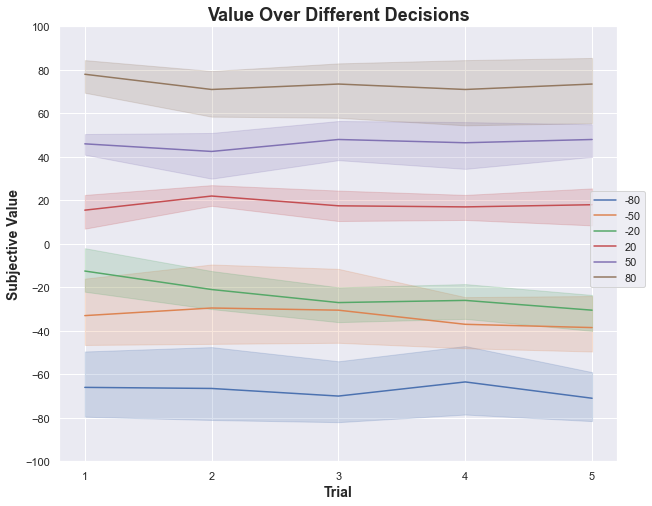

In [13]:
#convert the data type of  'stim' to a categorical data type 
db['stim']= db.stim.astype('category')

#plot the mean value rating for type of stimuli (different colors) in the 5 different trials 
#each stimulus was presented twice within-domain (choosing between rewards or between punishmemts) and 3 times mixed-domain
sns.lineplot(data=db, x='trial',y = 'SV', hue='stim')

#adjust ticks on the x-axis
plt.xticks([1,2,3,4,5])

#adjust ticks on the y-axis
yticks = np.arange(-100,101,20)
plt.yticks(yticks)

#adjust axes titles
plt.xlabel('Trial', fontsize=14, fontweight='bold')
plt.ylabel('Subjective Value', fontsize=14, fontweight='bold')

#create plot title
plt.title('Value Over Different Decisions', fontdict={'fontname': 'Arial', 'fontsize': 18, 'fontweight': 'bold'})

#set figure size in inches
sns.set(rc={'figure.figsize':(10,8)})

#position legend
plt.legend(loc=(0.95, 0.40))

# Save the plot as a PNG
#plt.savefig("C:\\Users\\zhb4\\Box Sync\\Neural Computations\\Online Pilot\\Subjective_Value_Plot.png")

In [14]:
#iterate over all subjects and find unique values of subject ID
db = pd.DataFrame()

for sub in df['sub'].unique():
    #for each unique value, create a temporary DataFrame 
    temp_df = df[df['sub'] == sub]
    #drop any rows in temp_df that contain missing values
    temp_df = temp_df.dropna()
    
    #iterate over all stimuli values -high/med/low punishment and low/med/high reward
    for val in stim_values:
        trial = 1
        #check if the value of 'stim1' or 'stim2' columns in the row is equal to the current stimuli value 'val'
        #if so, calculate reported confidence 'Conf' and create a dictionary with 'sub', 'stim', 'Conf' and 'trial'
        for i, row in temp_df.iterrows():
            if temp_df['stim1'][i] == val:
                Conf = temp_df['conf1'][i]
                dic = {'sub': sub, 'stim': val, 'Conf': Conf, 'trial': trial}
                db = pd.concat([db, pd.DataFrame(dic, index=[0])])
                trial += 1
            if temp_df['stim2'][i] == val:
                Conf = temp_df['conf2'][i]
                if Conf !=Conf:
                    print(i)
                dic = {'sub': sub, 'stim': val, 'Conf': Conf, 'trial': trial}
                db = pd.concat([db, pd.DataFrame(dic, index=[0])])
                trial += 1

#resets the index of db and drop the previous index.
db = db.reset_index(drop=True)

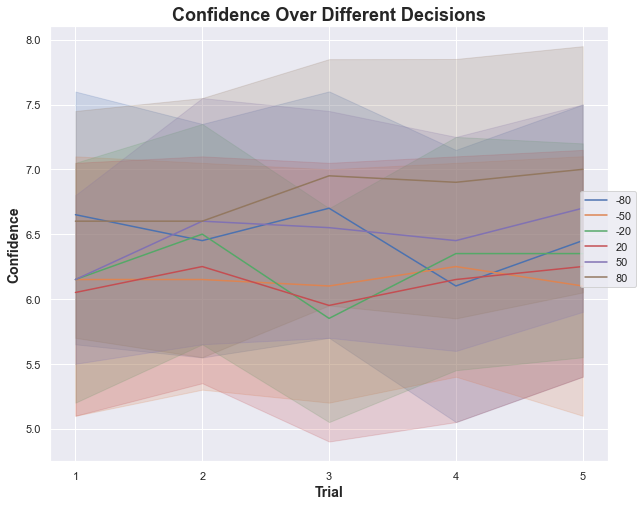

In [15]:
#convert the data type of  'stim' to a categorical data type 
db['stim']= db.stim.astype('category')

#plot the mean confidence rating for type of stimuli (different colors) in the 5 different trials 
#each stimulus was presented twice within-domain (choosing between rewards or between punishmemts) and 3 times mixed-domain
sns.lineplot(data=db, x='trial',y = 'Conf', hue='stim')

#adjust ticks on the x-axis
plt.xticks([1,2,3,4,5])

#adjust ticks on the y-axis
#yticks = np.arange(0,11,1)
#plt.yticks(yticks)

#adjust axes titles
plt.xlabel('Trial', fontsize=14, fontweight='bold')
plt.ylabel('Confidence', fontsize=14, fontweight='bold')

#create plot title
plt.title('Confidence Over Different Decisions', fontdict={'fontname': 'Arial', 'fontsize': 18, 'fontweight': 'bold'})

#set figure size in inches
sns.set(rc={'figure.figsize':(10,8)})

#position legend
plt.legend(loc=(0.95, 0.40))

# Save the plot as a PNG
#plt.savefig("C:\\Users\\zhb4\\Box Sync\\Neural Computations\\Online Pilot\\Confidence_Plot.png")

In [27]:
temp_df

,sub,time,trial,stim1,stim2,decision,RT_decision,val1,RT_val1,conf1,RT_conf1,val2,RT_val2,conf2,RT_conf2,conf_decision,RT_conf_decision,correct_decision,trial_type,inconsistency
3,100,1678836966843,4,-20,-80,1,1.296,8.0,3.461,10.0,1.353,2.0,2.704,10.0,1.439,5.0,4.559,1,Punishments,0
4,100,1678836981764,5,-50,-80,1,1.058,5.0,3.904,10.0,1.444,2.0,1.463,10.0,0.904,5.0,2.001,1,Punishments,0
5,100,1678836995502,6,-50,-20,2,0.944,5.0,2.057,10.0,1.189,8.0,2.079,10.0,1.242,5.0,2.081,1,Punishments,0
15,100,1678837061890,16,50,-20,1,1.497,16.0,3.408,8.0,2.276,8.0,2.250,10.0,1.392,10.0,1.863,1,Mixed,0
16,100,1678837079819,17,20,-80,1,1.135,12.0,2.828,10.0,1.263,2.0,2.691,10.0,3.307,10.0,1.956,1,Mixed,0
17,100,1678837100094,18,50,-50,1,0.727,16.0,7.354,10.0,1.665,4.0,2.794,10.0,1.512,10.0,1.639,1,Mixed,0
18,100,1678837115752,19,-50,80,2,0.626,5.0,2.045,10.0,2.215,18.0,3.680,10.0,1.412,10.0,1.008,1,Mixed,0
19,100,1678837129198,20,80,-80,1,0.805,18.0,2.753,10.0,1.244,2.0,2.633,10.0,0.922,10.0,1.170,1,Mixed,0
20,100,1678837146940,21,20,-50,1,0.853,12.0,3.916,10.0,1.803,5.0,3.477,10.0,1.306,10.0,1.895,1,Mixed,0
21,100,1678837164144,22,80,-20,1,0.531,18.0,6.170,10.0,1.184,8.0,1.795,10.0,1.114,10.0,1.924,1,Mixed,0


In [79]:
db = pd.DataFrame()

for sub in df['sub'].unique():
    temp_df = df[df['sub'] == sub]
    temp_df = temp_df.dropna()
    
    for val in stim_values:
        trial = 1
        for i, row in temp_df.iterrows():
            if temp_df['stim1'][i] in [val] or temp_df['stim2'][i] in [val]:
                dec_conf = temp_df['conf_decision'][i]
                dic = {'sub': sub, 'stim1': temp_df['stim1'][i], 'stim2': temp_df['stim2'][i], 'trial': trial, 'dec_conf': dec_conf}
                db = pd.concat([db, pd.DataFrame(dic, index=[0])])
                trial += 1

db = db.reset_index(drop=True)

db = db.drop_duplicates(subset=['sub', 'stim1', 'stim2', 'dec_conf'])
db = db.reset_index(drop=True)
db


,sub,stim1,stim2,trial,dec_conf
0,100,-20,-80,1,5.0
1,100,-50,-80,2,5.0
2,100,20,-80,3,10.0
3,100,80,-80,4,10.0
4,100,50,-80,5,10.0
...,...,...,...,...,...
295,99,-20,50,4,7.0
296,99,80,-20,5,9.0
297,99,20,80,1,8.0
298,99,20,50,2,6.0


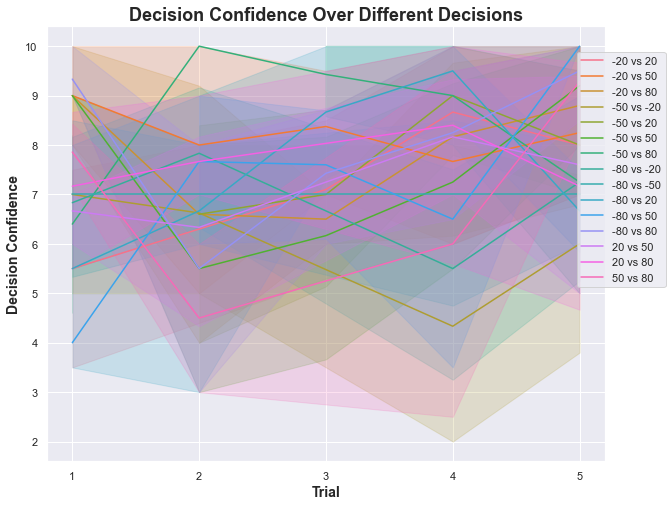

In [78]:
#convert the data type of  'stim' to a categorical data type 
db['stim1']= db.stim1.astype('category')
db['stim2']= db.stim2.astype('category')

# Add a new column 'decision' to the existing DataFrame
db['decision'] = db.apply(lambda x: f"{min(x['stim1'], x['stim2'])} vs {max(x['stim1'], x['stim2'])}", axis=1)

# Convert the data type of 'stim' to a categorical data type
db['decision'] = db['decision'].astype('category')

#plot the mean confidence rating for type of stimuli (different colors) in the 5 different trials 
#each stimulus was presented twice within-domain (choosing between rewards or between punishmemts) and 3 times mixed-domain
sns.lineplot(data=db, x='trial',y = 'dec_conf', hue='decision')

#adjust ticks on the x-axis
plt.xticks([1,2,3,4,5])

#adjust ticks on the y-axis
#yticks = np.arange(0,11,1)
#plt.yticks(yticks)

#adjust axes titles
plt.xlabel('Trial', fontsize=14, fontweight='bold')
plt.ylabel('Decision Confidence', fontsize=14, fontweight='bold')

#create plot title
plt.title('Decision Confidence Over Different Decisions', fontdict={'fontname': 'Arial', 'fontsize': 18, 'fontweight': 'bold'})

#set figure size in inches
sns.set(rc={'figure.figsize':(10,8)})

#position legend
plt.legend(loc=(0.95, 0.40))

# Save the plot as a PNG
#plt.savefig("C:\\Users\\zhb4\\Box Sync\\Neural Computations\\Online Pilot\\Confidence_Plot.png")